In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from scipy import stats

## Error Visible Calculation

In [15]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

## Input Data

In [16]:
train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('new_cases')
test_labels = test_features.pop('new_cases')
X = train_features.to_numpy()
Y = train_labels.to_numpy()
test_X = test_features.to_numpy()
test_Y = test_labels.to_numpy()
input_shape = (3,)

In [17]:
train_features

,date,popluation,AgeGroup
0,265,245353,1
1,370,1677000,1
2,251,1677000,3
3,285,1677000,2
4,389,7544000,2
...,...,...,...
70639,55,1677000,5
70640,237,245353,4
70641,245,7544000,2
70642,68,5071000,3


# MLP

In [20]:
model = Sequential()
model.add(BatchNormalization(input_dim=X.shape[1]))
model.add(Dense(6,activation="tanh"))
model.add(BatchNormalization())
model.add(Dense(18,activation="relu"))
#model.add(BatchNormalization())
model.add(Dense(6,activation="relu"))
#model.add(BatchNormalization())
model.add(Dense(3,activation="relu"))
model.add(Dense(1,activation="linear"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 3)                 12        
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 24        
_________________________________________________________________
batch_normalization_7 (Batch (None, 6)                 24        
_________________________________________________________________
dense_16 (Dense)             (None, 18)                126       
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 114       
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [21]:
opt = keras.optimizers.Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.compile(loss='MSE', optimizer=opt, metrics=['mean_squared_error'])
model.fit(X, Y, epochs=2000, batch_size=100, verbose=1, validation_split=0.1,callbacks=[early_stopping])
model.summary()

Epoch 1/2000
636/636 [==============================] - 1s 1ms/step - loss: 23865.1836 - mean_squared_error: 23865.1836 - val_loss: 20171.5176 - val_mean_squared_error: 20171.5176
Epoch 2/2000
636/636 [==============================] - 1s 842us/step - loss: 20674.3066 - mean_squared_error: 20674.3066 - val_loss: 17651.6875 - val_mean_squared_error: 17651.6875
Epoch 3/2000
636/636 [==============================] - 1s 918us/step - loss: 19427.0781 - mean_squared_error: 19427.0781 - val_loss: 16887.6836 - val_mean_squared_error: 16887.6836
Epoch 4/2000
636/636 [==============================] - 0s 765us/step - loss: 19276.3555 - mean_squared_error: 19276.3555 - val_loss: 16720.1074 - val_mean_squared_error: 16720.1074
Epoch 5/2000
636/636 [==============================] - 0s 734us/step - loss: 18990.1309 - mean_squared_error: 18990.1309 - val_loss: 16525.2383 - val_mean_squared_error: 16525.2383
Epoch 6/2000
636/636 [==============================] - 0s 757us/step - loss: 18872.2930 - m

Epoch 46/2000
636/636 [==============================] - 0s 724us/step - loss: 18444.5957 - mean_squared_error: 18444.5957 - val_loss: 16077.7588 - val_mean_squared_error: 16077.7598
Epoch 47/2000
636/636 [==============================] - 0s 745us/step - loss: 18655.6367 - mean_squared_error: 18655.6367 - val_loss: 16100.4287 - val_mean_squared_error: 16100.4287
Epoch 48/2000
636/636 [==============================] - 0s 728us/step - loss: 18493.0430 - mean_squared_error: 18493.0430 - val_loss: 16112.6455 - val_mean_squared_error: 16112.6455
Epoch 49/2000
636/636 [==============================] - 0s 758us/step - loss: 18547.6309 - mean_squared_error: 18547.6309 - val_loss: 16084.6055 - val_mean_squared_error: 16084.6055
Epoch 50/2000
636/636 [==============================] - 0s 731us/step - loss: 18513.8320 - mean_squared_error: 18513.8320 - val_loss: 16095.0000 - val_mean_squared_error: 16095.0000
Epoch 51/2000
636/636 [==============================] - 0s 743us/step - loss: 18586.

In [22]:
predict = model.predict(X)
r2_score(Y,predict)

0.2547513514809826

In [23]:
r2_score(test_Y,model.predict(test_X))

0.25729050340585446

In [26]:
 mean_squared_error(test_Y,model.predict(test_X))

16689.06737232221

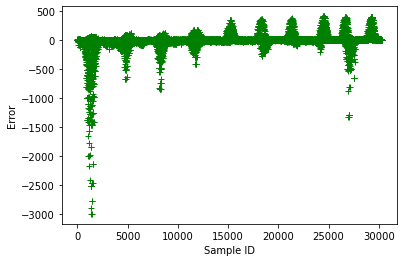

DescribeResult(nobs=30276, minmax=(array([0.00065136], dtype=float32), array([2997.6035], dtype=float32)), mean=array([43.201027], dtype=float32), variance=array([15042.303], dtype=float32), skewness=array([9.889432], dtype=float32), kurtosis=array([150.09741], dtype=float32))

In [42]:
test_predict = model.predict(test_features)

error,abserror = errorCalculate(test_Y,test_predict)
plt.plot(error,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(abserror)

In [43]:
model.save('mlp')

INFO:tensorflow:Assets written to: mlp\assets


In [44]:
model_upload = load_model("mlp")

In [45]:
model_upload.predict(test_X)

array([[22.682428 ],
       [ 7.9997387],
       [ 8.208836 ],
       ...,
       [ 8.903623 ],
       [ 9.094419 ],
       [ 8.699245 ]], dtype=float32)

In [46]:
test_Y

array([7, 0, 0, ..., 0, 0, 1], dtype=int64)